# Name : Tufan Kundu
# Reg no. : 24MDT0184

# Experiment 5
# 8 Feb, 2025
## Regression analysis and predictive Models

## Multiple Linear Regression Analysis with Advertising Data

### Objective: To perform multiple linear regression analysis using two models: one with limited predictors (TV and Radio) and one with all predictors (TV, Radio, and Newspaper). The experiment involves fitting models, extracting key metrics (coefficients, residuals, confidence intervals), and visualizing the results.

## 1. Data Exploration and Preparation:


### Importing the necessary libraries



In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

### Loading the dataset

In [10]:
df = pd.read_excel("advertising.xlsx")
print("First few rows of the data:")
df.head(5)

First few rows of the data:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. Limited Model (TV and Radio):

In [11]:
## Defining predictors(X) and response (y) using only TV and Radio
x_limited = df[['TV','Radio']]
y = df['Sales']

## Fit multiple Linear regression model using sklearn (limited predictors)
model_limited = LinearRegression()
model_limited.fit(x_limited,y)

## Printing coefficients and intercept for the limited model
print("Limited model intercept:", model_limited.intercept_)
print("Limited model coefficients:", model_limited.coef_)

## Predicting sales and calculating residuals for the limited model
df['Predicted_sales_limited'] = model_limited.predict(x_limited)
df['Residuals_limited'] = df['Sales'] - df['Predicted_sales_limited']



Limited model intercept: 4.63087946409777
Limited model coefficients: [0.05444896 0.10717457]


In [13]:
## Model summary using statsmodel(limited predictors)
x_limited_with_intercept = sm.add_constant(x_limited) ## Adding intercept manually for statsmodel
ols_model_limited = sm.OLS(y,x_limited_with_intercept).fit()

## Display the model summary with the limited model
print("Limited model summary:\n", ols_model_limited.summary())

Limited model summary:
                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          2.39e-100
Time:                        12:07:12   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0

## 3. Full Model (TV, Radio, and Newspaper):

In [14]:
## Regression analysis using all predictors 
x_full = df[['TV','Radio','Newspaper']]


## Fit full model using sklearn
model_full = LinearRegression()
model_full.fit(x_full,y)


## Printing coefficients and intercept for the full model
print("Full model intercept:", model_full.intercept_)
print("Full model coefficients:", model_full.coef_)

## Predicting sales and calculating residuals for the full model
df['Predicted_sales_full'] = model_full.predict(x_full)
df['Residuals_full'] = df['Sales'] - df['Predicted_sales_full']


## Model summary using statsmodel(Full predictors)
x_full_with_intercept = sm.add_constant(x_full) ## Adding intercept manually for statsmodel
ols_model_full = sm.OLS(y,x_full_with_intercept).fit()

## Display the model summary with the limited model
print("Full model summary:\n", ols_model_full.summary())

Full model intercept: 4.625124078808653
Full model coefficients: [0.05444578 0.10700123 0.00033566]
Full model summary:
                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           8.13e-99
Time:                        12:08:15   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

In [17]:
## Extract confidence intervals and standard errors for both models

print("Limited model confidence intervals:\n", ols_model_limited.conf_int())
print("\nLimited model standard errors:\n", ols_model_limited.bse)
print("\nFull model confidence intervals:\n", ols_model_full.conf_int())
print("\nFull model Standard Errors:\n", ols_model_full.bse)


Limited model confidence intervals:
               0         1
const  4.058369  5.203390
TV     0.051746  0.057152
Radio  0.091544  0.122805

Limited model standard errors:
 const    0.290308
TV       0.001371
Radio    0.007926
dtype: float64

Full model confidence intervals:
                   0         1
const      4.018688  5.231560
TV         0.051734  0.057158
Radio      0.090259  0.123744
Newspaper -0.011079  0.011751

Full model Standard Errors:
 const        0.307501
TV           0.001375
Radio        0.008490
Newspaper    0.005788
dtype: float64


## 4. Visualization:

### 3D visualization of the regression plane with residuals for the limited model

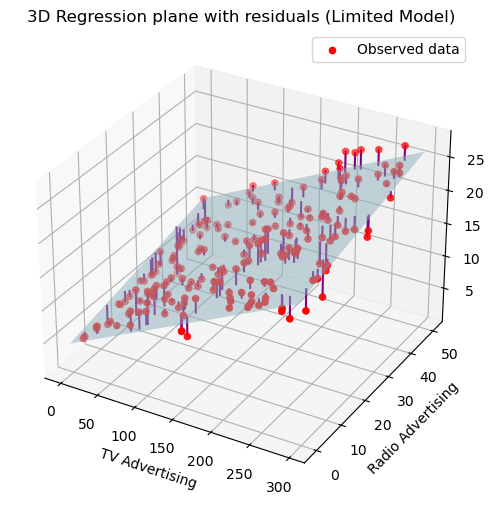

In [27]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df['TV'],df['Radio'],df['Sales'],color = 'red', label='Observed data')

## Generate grid for plotting the regression plane for the limited model
tv_range = np.linspace(df['TV'].min()-1,df['TV'].max()+1,10)
radio_range = np.linspace(df['Radio'].min()-1,df['Radio'].max()+1,10)
Tv_grid, Radio_grid = np.meshgrid(tv_range,radio_range)

## Computing the predicted sales for the grid points(limited model)
sales_pred_limited = model_limited.intercept_ + model_limited.coef_[0]*Tv_grid + model_limited.coef_[1]*Radio_grid

## Plot the regression plane for the limited model
ax.plot_surface(Tv_grid,Radio_grid,sales_pred_limited,color = 'lightblue',alpha = 0.5)

## Plot residuals as vertical lines for the limited model
for i in range(len(df)):
    ax.plot([df['TV'][i],df['TV'][i]],[df['Radio'][i],df['Radio'][i]],[df['Sales'][i], df['Predicted_sales_limited'][i]],color = 'purple')

## Labels and legend 
ax.set_xlabel("TV Advertising")
ax.set_ylabel("Radio Advertising")
ax.set_zlabel("Sales")
ax.legend()
plt.title("3D Regression plane with residuals (Limited Model)")
plt.show()

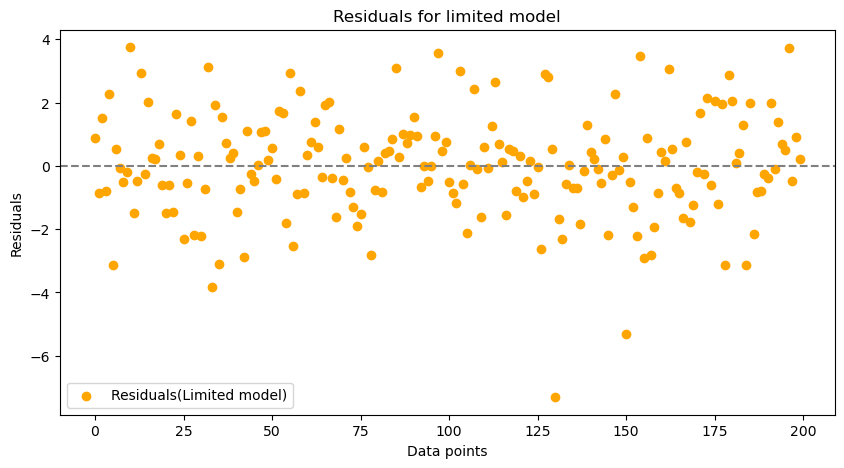

In [28]:
## Residual plot for the limited model

plt.figure(figsize=(10,5))
plt.scatter(range(len(df)),df['Residuals_limited'],color = 'orange', label = 'Residuals(Limited model)')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.title("Residuals for limited model")
plt.xlabel("Data points")
plt.ylabel("Residuals")
plt.legend()
plt.show()

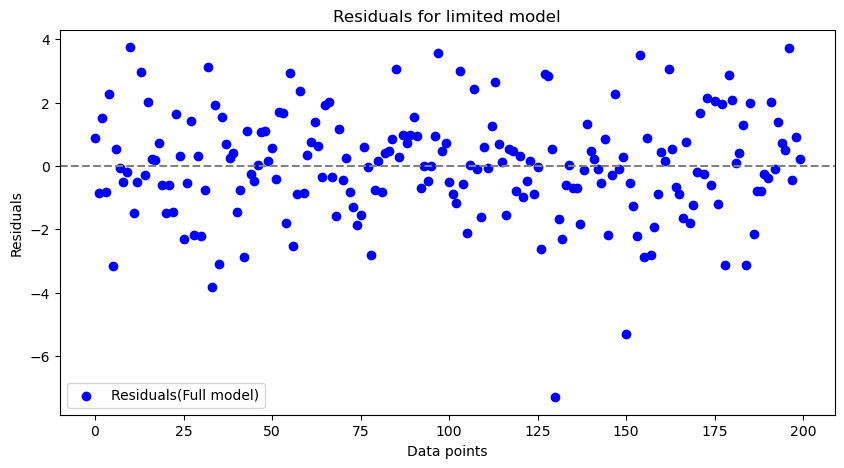

In [30]:
## Residual plot for the full model

plt.figure(figsize=(10,5))
plt.scatter(range(len(df)),df['Residuals_full'],color = 'blue', label = 'Residuals(Full model)')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.title("Residuals for limited model")
plt.xlabel("Data points")
plt.ylabel("Residuals")
plt.legend()
plt.show()